In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

In [2]:
df_1 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/dataset_3sr_contained/50x12P5_bs5000_34c2da80_20t_train-dataset_2s_test-dataset_2s_vars.parquet')
df_2 = pd.read_parquet('/home/dajiang/smart-pixels-ml/processed_parquets/dataset_3sr_contained/50x12P5_bs5000_34c2da80_2t_train-dataset_2s_test-dataset_2s_vars.parquet')

#### Scaling Lists for Different Pixel Pitches (dataset_2s):
* 100x25x100 um:  [150.0, 37.5, 10.0, 1.22]
* 50x25x100 um:   [75.0, 37.5, 10.0, 1.22]
* 50x20x100 um:   [75.0, 30.0, 10.0, 1.22]
* 50x15x100 um:   [75.0, 22.5, 10.0, 1.22]
* 50x12.5x100 um: [75.0, 18.75, 10.0, 1.22]
* 50x10x100 um:   [75.0, 15.0, 10.0, 1.22]

#### Scaling Lists for Different Pixel Pitches (dataset_3sr):
* 100x25x100 um:  [150.0, 37.5, 10.0, 10.0]
* 50x25x100 um:   [75.0, 37.5, 10.0, 10.0]
* 50x20x100 um:   [75.0, 30.0, 10.0, 10.0]
* 50x15x100 um:   [75.0, 22.5, 10.0, 10.0]
* 50x12.5x100 um: [75.0, 18.75, 10.0, 10.0]
* 50x10x100 um:   [75.0, 15.0, 10.0, 10.0]

#### Scaling Lists for Different Pixel Pitches (dataset_3sr, |cot$\beta$| $\leq$ 1.5):
* 100x25x100 um:  [150.0, 37.5, 10.0, 1.5]
* 50x25x100 um:   [75.0, 37.5, 10.0, 1.5]
* 50x20x100 um:   [75.0, 30.0, 10.0, 1.5]
* 50x15x100 um:   [75.0, 22.5, 10.0, 1.5]
* 50x12.5x100 um: [75.0, 18.75, 10.0, 1.5]
* 50x10x100 um:   [75.0, 15.0, 10.0, 1.5]

### $x$ Residuals

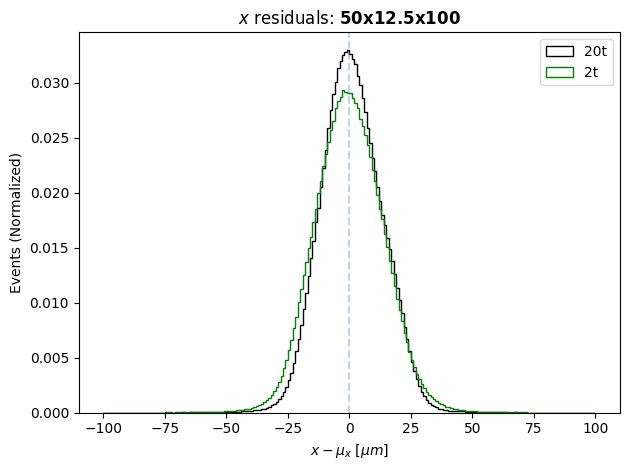

In [7]:
fig, ax = plt.subplots()
bins = np.linspace(-100,100,201)

ax.hist((df_1['residualsX'])*75.0, bins=bins, histtype='step', color='black', label='20t', density=True)
ax.hist((df_2['residualsX'])*75.0, bins=bins, histtype='step', color='green', label='2t', density=True)

ax.axvline(alpha=0.3,ls='dashed')

ax.legend()
ax.set_title(r'$x$ residuals: $\mathbf{50x12.5x100}$')
ax.set_xlabel('$x - \mu_{x}$ $[\mu m]$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_contained/xresiduals.png', dpi=300)
fig.show()

### $y$ Residuals

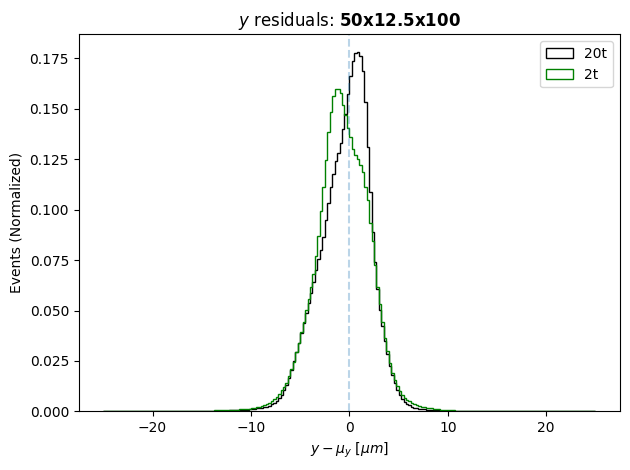

In [8]:
fig, ax = plt.subplots()
bins = np.linspace(-25,25,201)

ax.hist((df_1['residualsY'])*18.75, bins=bins, histtype='step', color='black', label='20t', density=True)
ax.hist((df_2['residualsY'])*18.75, bins=bins, histtype='step', color='green', label='2t', density=True)
ax.axvline(alpha=0.3,ls='dashed')

ax.legend()
ax.set_title(r'$y$ residuals: $\mathbf{50x12.5x100}$')
ax.set_xlabel('$y - \mu_{y}$ $[\mu m]$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_contained/yresiduals.png', dpi=300)
fig.show()

### cot $\alpha$ Residuals

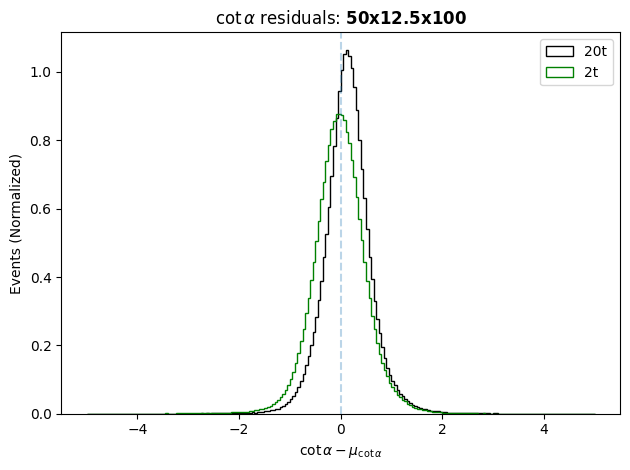

In [9]:
fig, ax = plt.subplots()
bins = np.linspace(-5,5,201)

ax.hist((df_1['residualsA'])*10.0, bins=bins, histtype='step', color='black', label='20t', density=True)
ax.hist((df_2['residualsA'])*10.0, bins=bins, histtype='step', color='green', label='2t', density=True)
ax.axvline(alpha=0.3,ls='dashed')

ax.legend()
ax.set_title(r'$\cot \alpha$ residuals: $\mathbf{50x12.5x100}$')
ax.set_xlabel(r'$\cot \alpha - \mu_{\cot \alpha}$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_contained/cotAresiduals.png', dpi=300)
fig.show()

### cot $\beta$ Residuals

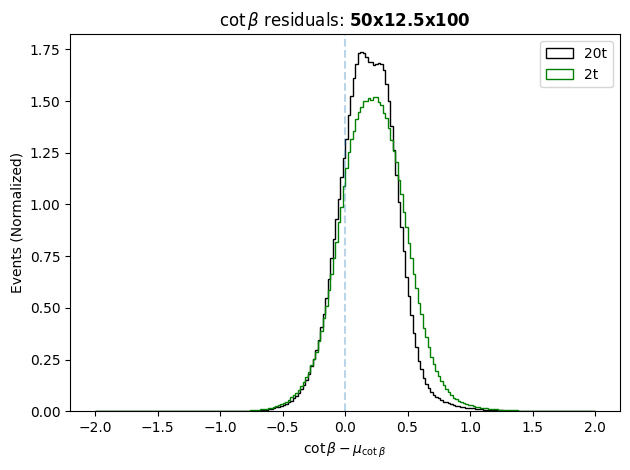

In [10]:
fig, ax = plt.subplots()
bins = np.linspace(-2,2,201)

ax.hist((df_1['residualsB'])*1.22, bins=bins, histtype='step', color='black', label='20t', density=True)
ax.hist((df_2['residualsB'])*1.22, bins=bins, histtype='step', color='green', label='2t', density=True)
ax.axvline(alpha=0.3,ls='dashed')

ax.legend()
ax.set_title(r'$\cot \beta$ residuals: $\mathbf{50x12.5x100}$')
ax.set_xlabel(r'$\cot \beta - \mu_{\cot \beta}$')
ax.set_ylabel('Events (Normalized)')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_contained/cotBresiduals.png', dpi=300)
fig.show()

### Residuals + Uncertainties Comparison

In [38]:
def residual_plot(ax, thisdf, var1, var2, name, color, label=None, scaling=1.0, alpha=0.2):
    
    nbins = 100
    
    var1_scaled = thisdf[var1] * scaling
    var2_scaled = thisdf[var2] * scaling
    residual_scaled = var1_scaled - var2_scaled
    
    xmin = np.min(var1_scaled)
    xmax = np.max(var1_scaled)
    
    step = 1.0*(xmax-xmin)/nbins
    
    x = sns.regplot(x=var1_scaled, y=residual_scaled, x_bins=np.linspace(xmin,xmax,nbins), fit_reg=None, marker='.', ax=ax, color=color, label=label)
    ax.set_xlabel('True ' + name)
    ax.set_ylabel('True - predicted ' + name)
    
    thisdf['residual'+var2] = residual_scaled
    print(var1)
    
    means = []
    upbar = []
    downbar = []
    for i in range(0,nbins):
        means += [np.mean(thisdf['residual'+var2][(var1_scaled>xmin + i*step) & (var1_scaled<xmin + (i+1)*step)])]
        upbar += [means[i] + np.mean(thisdf['sigma'+var2][(var1_scaled>xmin + i*step) & (var1_scaled<xmin + (i+1)*step)] * scaling)]
        downbar += [means[i] - np.mean(thisdf['sigma'+var2][(var1_scaled>xmin + i*step) & (var1_scaled<xmin + (i+1)*step)] * scaling)]
    ax.fill_between(x=np.linspace(xmin,xmax,nbins),y1=upbar,y2=downbar, alpha=alpha, color=color)

pi = 3.14159265359

def inverse_cot(cota):
    a = np.arctan(1.0/cota)
    a[np.where(a<0)] = a[np.where(a<0)] + pi
    return a    

def residual_plot_deg(ax, thisdf, var1, var2, name, color, label=None, scaling=1.0, alpha=0.2):
    # positions
    if 'cot' not in var1:
        residual_plot(ax, thisdf, var1, var2, name, scaling=scaling)
        return

    thisdf['angle'] = inverse_cot(thisdf[var2].values * scaling)*180/pi
    
    thisdf['angleup'] = abs(inverse_cot((thisdf[var2].values + thisdf['sigma'+var2].values) * scaling)*180/pi - thisdf['angle'])
    thisdf['angledown'] = abs(inverse_cot((thisdf[var2].values - thisdf['sigma'+var2].values) * scaling)*180/pi - thisdf['angle'])
    thisdf['angletrue'] = inverse_cot(thisdf[var1].values * scaling)*180/pi
        
    var1 = 'angletrue'
    var2 = 'angle'
    
    nbins = 15
    xmin = np.min(thisdf[var1])
    xmax = np.max(thisdf[var1])
    
    step = 1.0*(xmax-xmin)/nbins
        
    x = sns.regplot(x=thisdf[var1], y=(thisdf[var1]-thisdf[var2]), x_bins=np.linspace(xmin,xmax,nbins), fit_reg=None, marker='.', ax=ax, color=color, label=label)
    ax.set_xlabel('True ' + name)
    ax.set_ylabel('True - predicted ' + name)
    
    thisdf['residual'+var2] = (thisdf[var1]-thisdf[var2])
    print(var1)
    
    means = []    
    upbar = []
    downbar = []
    for i in range(0,nbins):
        means += [np.mean(thisdf['residual'+var2][(thisdf[var1]>xmin + i*step) & (thisdf[var1]<xmin + (i+1)*step)])]
        upbar += [means[i] + np.mean(thisdf['angleup'][(thisdf[var1]>xmin + i*step) & (thisdf[var1]<xmin + (i+1)*step)])]
        downbar += [means[i] - np.mean(thisdf['angledown'][(thisdf[var1]>xmin + i*step) & (thisdf[var1]<xmin + (i+1)*step)])]
    #ax.scatter(x=np.linspace(xmin,xmax,nbins),y=means)
    ax.fill_between(x=np.linspace(xmin,xmax,nbins),y1=upbar,y2=downbar, alpha=alpha, color=color)

### Residuals vs Truth 

xtrue
xtrue
xtrue
xtrue
xtrue
xtrue
ytrue
ytrue
ytrue
ytrue
ytrue
ytrue


/tmp/ipykernel_605338/3106693341.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)
/tmp/ipykernel_605338/3106693341.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue


/tmp/ipykernel_605338/3106693341.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)
/tmp/ipykernel_605338/3106693341.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue


/tmp/ipykernel_605338/3106693341.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)
/tmp/ipykernel_605338/3106693341.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue


/tmp/ipykernel_605338/3106693341.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)
/tmp/ipykernel_605338/3106693341.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue


/tmp/ipykernel_605338/3106693341.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)
/tmp/ipykernel_605338/3106693341.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue


/tmp/ipykernel_605338/3106693341.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)
/tmp/ipykernel_605338/3106693341.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue


/tmp/ipykernel_605338/3106693341.py:33: RuntimeWarning: divide by zero encountered in divide
  a = np.arctan(1.0/cota)


angletrue
angletrue
angletrue
angletrue
angletrue
angletrue


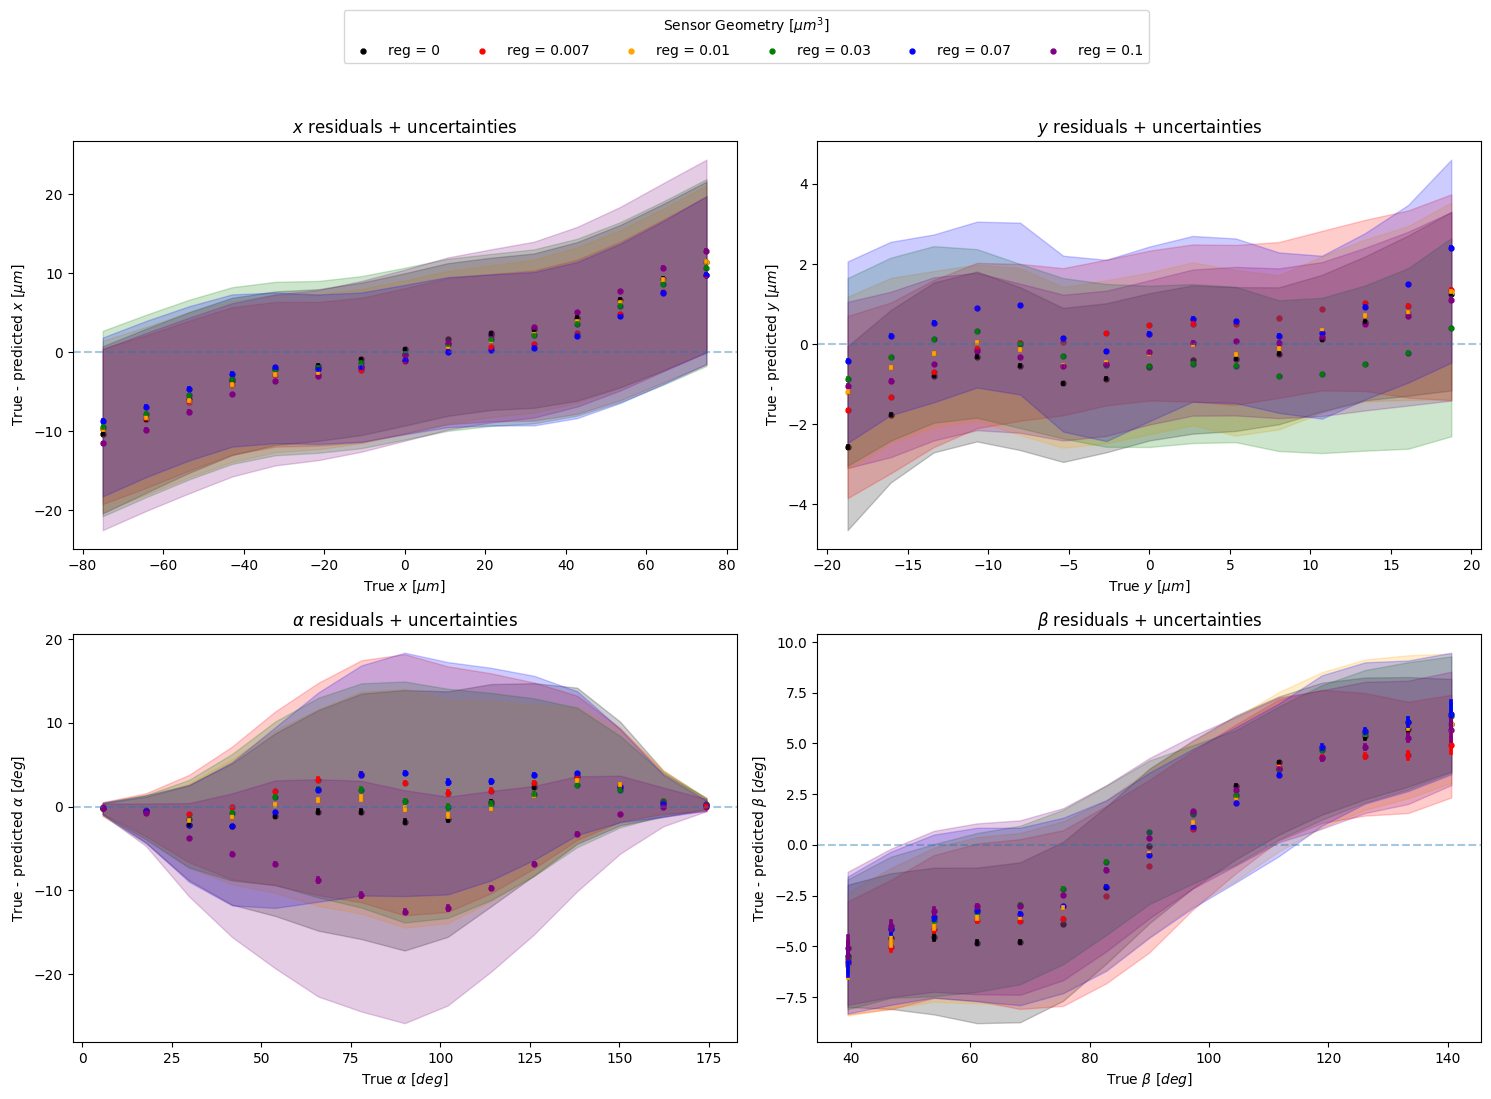

In [23]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
residual_plot(ax[0,0], df_1, 'xtrue', 'x', label='reg = 0', name=r'$x$ $[\mu m]$', color='black', scaling=75.0)
residual_plot(ax[0,0], df_2, 'xtrue', 'x', label='reg = 0.007', name=r'$x$ $[\mu m]$', color='red', scaling=75.0)
residual_plot(ax[0,0], df_3, 'xtrue', 'x', label='reg = 0.01', name=r'$x$ $[\mu m]$', color='orange', scaling=75.0)
residual_plot(ax[0,0], df_4, 'xtrue', 'x', label='reg = 0.03', name=r'$x$ $[\mu m]$', color='green', scaling=75.0)
residual_plot(ax[0,0], df_5, 'xtrue', 'x', label='reg = 0.07', name=r'$x$ $[\mu m]$', color='blue', scaling=75.0)
residual_plot(ax[0,0], df_6, 'xtrue', 'x', label='reg = 0.1', name=r'$x$ $[\mu m]$', color='purple', scaling=75.0)

ax[0,0].axhline(alpha=0.4, ls='dashed')
ax[0,0].set_title(r'$x$ residuals + uncertainties')

residual_plot(ax[0,1], df_1, 'ytrue', 'y', name=r'$y$ $[\mu m]$', color='black', scaling=18.75)
residual_plot(ax[0,1], df_2, 'ytrue', 'y', name=r'$y$ $[\mu m]$', color='red', scaling=18.75)
residual_plot(ax[0,1], df_3, 'ytrue', 'y', name=r'$y$ $[\mu m]$', color='orange', scaling=18.75)
residual_plot(ax[0,1], df_4, 'ytrue', 'y', name=r'$y$ $[\mu m]$', color='green', scaling=18.75)
residual_plot(ax[0,1], df_5, 'ytrue', 'y', name=r'$y$ $[\mu m]$', color='blue', scaling=18.75)
residual_plot(ax[0,1], df_6, 'ytrue', 'y', name=r'$y$ $[\mu m]$', color='purple', scaling=18.75)

ax[0,1].axhline(alpha=0.4, ls='dashed')
ax[0,1].set_title(r'$y$ residuals + uncertainties')

residual_plot_deg(ax[1,0], df_1, 'cotAtrue', 'cotA', name=r'$\alpha$ $[deg]$', color='black', scaling=10.0)
residual_plot_deg(ax[1,0], df_2, 'cotAtrue', 'cotA', name=r'$\alpha$ $[deg]$', color='red', scaling=10.0)
residual_plot_deg(ax[1,0], df_3, 'cotAtrue', 'cotA', name=r'$\alpha$ $[deg]$', color='orange', scaling=10.0)
residual_plot_deg(ax[1,0], df_4, 'cotAtrue', 'cotA', name=r'$\alpha$ $[deg]$', color='green', scaling=10.0)
residual_plot_deg(ax[1,0], df_5, 'cotAtrue', 'cotA', name=r'$\alpha$ $[deg]$', color='blue', scaling=10.0)
residual_plot_deg(ax[1,0], df_6, 'cotAtrue', 'cotA', name=r'$\alpha$ $[deg]$', color='purple', scaling=10.0)

ax[1,0].axhline(alpha=0.4, ls='dashed')
ax[1,0].set_title(r'$\alpha$ residuals + uncertainties')

residual_plot_deg(ax[1,1], df_1, 'cotBtrue', 'cotB', name=r'$\beta$ $[deg]$', color='black', scaling=1.22)
residual_plot_deg(ax[1,1], df_2, 'cotBtrue', 'cotB', name=r'$\beta$ $[deg]$', color='red', scaling=1.22)
residual_plot_deg(ax[1,1], df_3, 'cotBtrue', 'cotB', name=r'$\beta$ $[deg]$', color='orange', scaling=1.22)
residual_plot_deg(ax[1,1], df_4, 'cotBtrue', 'cotB', name=r'$\beta$ $[deg]$', color='green', scaling=1.22)
residual_plot_deg(ax[1,1], df_5, 'cotBtrue', 'cotB', name=r'$\beta$ $[deg]$', color='blue', scaling=1.22)
residual_plot_deg(ax[1,1], df_6, 'cotBtrue', 'cotB', name=r'$\beta$ $[deg]$', color='purple', scaling=1.22)

ax[1,1].axhline(alpha=0.4, ls='dashed')
ax[1,1].set_title(r'$\beta$ residuals + uncertainties')

fig.tight_layout(pad=1.0)
fig.legend(title='Sensor Geometry [$\mu m^3$]', loc='upper center', ncol=7, bbox_to_anchor=(0.5, 1.1))
#fig.savefig('haar_comparison_plots/residuals_sigma.png',  bbox_inches='tight', dpi=300)
fig.show()

In [11]:
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

def pull_plot(ax, data, name, color, label=None,):
    
    h = ax.hist(data, bins=np.linspace(-20,20,100), histtype='step', label=label, color=color)
    ax.legend(loc='upper right')
    ax.set_xlabel(name)
    ax.set_yscale('log')
    ax.axvline(alpha=0.3, ls='dashed')

    ydata = h[0]
    xdata = h[1][:-1]+5/49

    pars, cov = curve_fit(gauss,xdata,ydata,maxfev=5000)

    xbins = np.linspace(-20,20,100)
    ax.plot(xbins,gauss(xbins,pars[0],pars[1],pars[2]),color='black')
    ax.set_ylim(0.5,1000000)

    #print('Mean',pars[1])
    #print('Sigma',par?s[2])
    
    ax.text(-7,11000,"$\mu$="+str(round(pars[1],2)))
    ax.text(3,11000,"$\sigma$="+str(round(abs(pars[2]),2)))

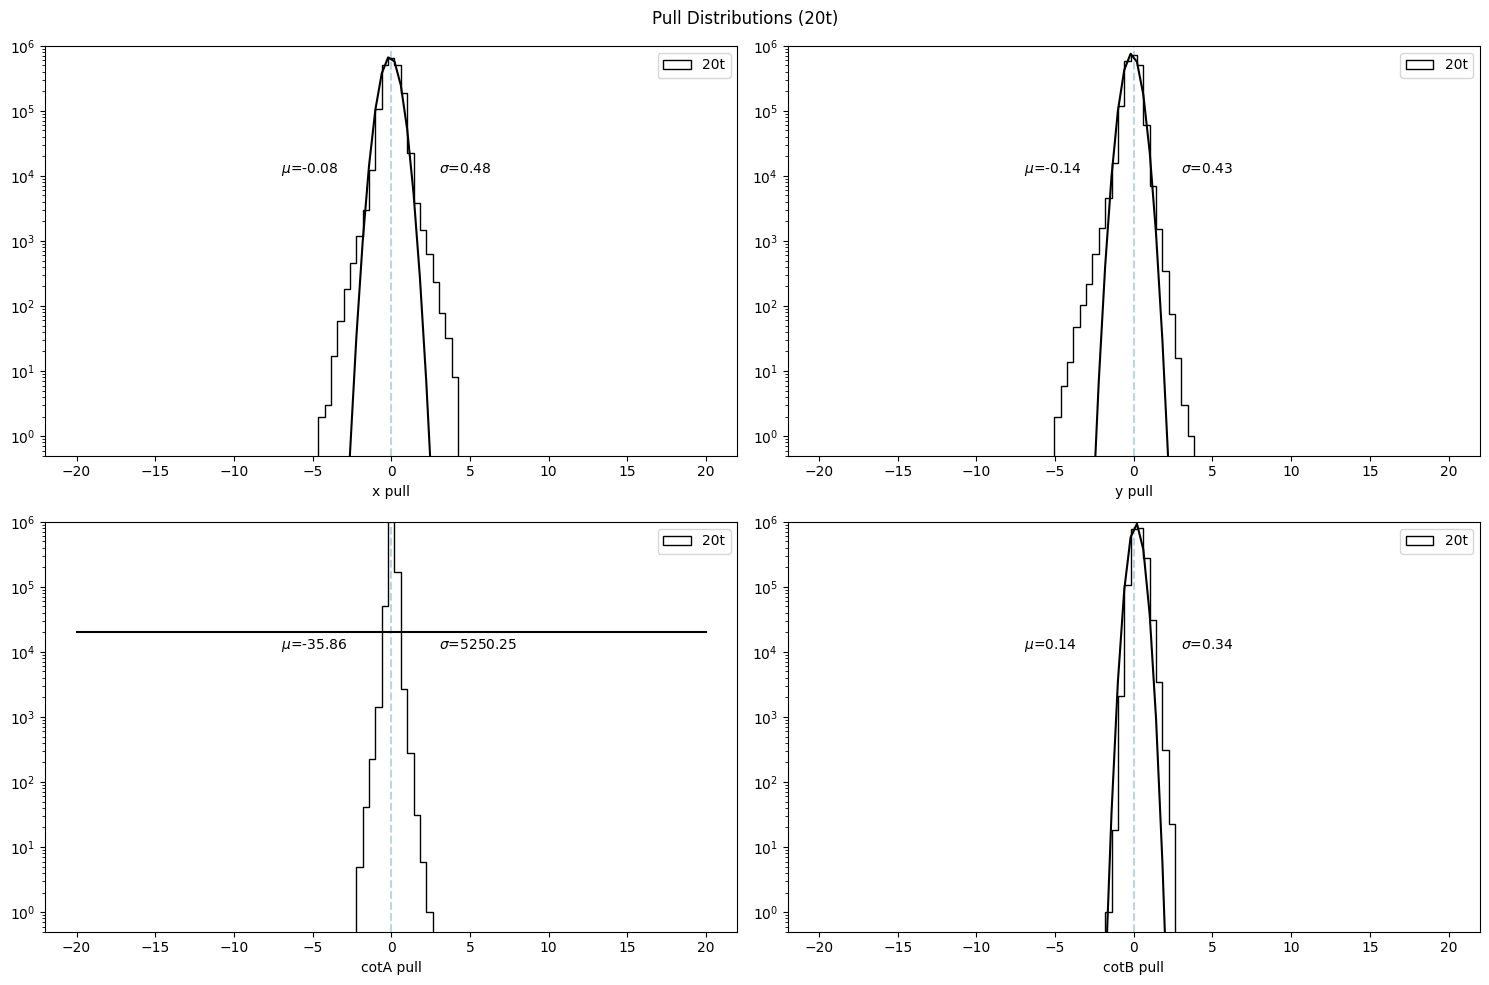

In [16]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
pull_plot(axes[0,0], df_1['pullx'], label='20t', name='x pull', color='black')
pull_plot(axes[0,1], df_1['pully'], label='20t', name='y pull', color='black')
pull_plot(axes[1,0], df_1['pullcotA'], label='20t', name='cotA pull', color='black')
pull_plot(axes[1,1], df_1['pullcotB'], label='20t', name='cotB pull', color='black')

fig.suptitle(r'Pull Distributions (20t)')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_contained/pulls_20t.png', dpi=300)

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
pull_plot(axes[0,0], df_2['pullx'], label='2t', name='x pull', color='green')
pull_plot(axes[0,1], df_2['pully'], label='2t', name='y pull', color='green')
pull_plot(axes[1,0], df_2['pullcotA'], label='2t', name='cotA pull', color='green')
pull_plot(axes[1,1], df_2['pullcotB'], label='2t', name='cotB pull', color='green')

fig.suptitle(r'Pull Distributions (2t)')
fig.tight_layout()
fig.savefig('plots/dataset_3sr_contained/pulls_2t.png', dpi=300)

#### KL Divergence for 2 Multivariate Gaussians:
$KL[P || Q] =  \frac{1}{2} \left[(\mu_2 - \mu_1)^\mathrm{T} \sigma_2^{-1} (\mu_2 - \mu_1) + \mathrm{tr}(\sigma_2^{-1} \sigma_1) - \ln\frac{|\sigma_1|}{|\sigma_2|} - n \right]$
* $P: x \textasciitilde N(\mu_1, \sigma_1)$
* $Q: x \textasciitilde N(\mu_2, \sigma_2)$

(source: https://statproofbook.github.io/P/mvn-kl.html)

In [40]:
def kl_divergence_4D(mu1, sigma1, mu2=np.array([[0],[0],[0],[0]]), sigma2=np.array([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])):
    """
    Inputs:
    mu1 should be (4,1) numpy array representing the means of (x, y, cotAlpha, cotBeta)
    sigma1 is the (4,4) covariance matrix of (x, y, cotAlpha, cotBeta)

    Returns:
    KL Divergence value (float)
    """
    a = np.transpose(mu2-mu1)
    b = np.linalg.inv(sigma2)
    c = mu2-mu1
    d = np.trace(b @ sigma1)
    e = np.log(np.linalg.det(sigma1) / np.linalg.det(sigma2))
    f = 4 
    return np.round(np.concatenate(0.5*(a @ b @ c + d - e - f))[0],3)

#### KL Divergence for 2 Univariate Gaussians: 
$KL[P||Q] = \log(\frac{\sigma_2}{\sigma_1}) + \frac{\sigma_1^2 + (\mu_1 - \mu_2)^2}{2\sigma_2^2} - \frac{1}{2}$


(source : https://stats.stackexchange.com/questions/7440/kl-divergence-between-two-univariate-gaussians)

In [24]:
def kl_divergence_1d(mu1, sigma1, mu2=0, sigma2=1):
    return np.round(np.log(sigma2/sigma1) + (sigma1**2 + (mu1 - mu2)**2)/(2*sigma2**2) - 0.5, 3)

In [25]:
# pull x
print('---PULLS x---')
kld_1_x = kl_divergence_1d(0.16,0.92)
print('kl divergence, pull x: {} ({})'.format(kld_1_x, pitch_1))
kld_2_x = kl_divergence_1d(-0.04,0.79)
print('kl divergence, pull x: {} ({})'.format(kld_2_x, pitch_2))
kld_3_x = kl_divergence_1d(-0.04,0.86)
print('kl divergence, pull x: {} ({})'.format(kld_3_x, pitch_3))
kld_4_x = kl_divergence_1d(0.15,0.86)
print('kl divergence, pull x: {} ({})'.format(kld_4_x, pitch_4))
kld_5_x = kl_divergence_1d(0.0,0.87)
print('kl divergence, pull x: {} ({})'.format(kld_5_x, pitch_5))
kld_6_x = kl_divergence_1d(0.03,0.8)
print('kl divergence, pull x: {} ({})'.format(kld_6_x, pitch_6))
kld_7_x = kl_divergence_1d(-0.16,0.9)
print('kl divergence, pull x: {} ({})'.format(kld_7_x, pitch_7))

# pull y
print('---PULLS y---')
kld_1_y = kl_divergence_1d(0.02,0.85)
print('kl divergence, pull y: {} ({})'.format(kld_1_y, pitch_1))
kld_2_y = kl_divergence_1d(-0.07,0.88)
print('kl divergence, pull y: {} ({})'.format(kld_2_y, pitch_2))
kld_3_y = kl_divergence_1d(0.07,0.87)
print('kl divergence, pull y: {} ({})'.format(kld_3_y, pitch_3))
kld_4_y = kl_divergence_1d(-0.01,0.85)
print('kl divergence, pull y: {} ({})'.format(kld_4_y, pitch_4))
kld_5_y = kl_divergence_1d(0.02,0.84)
print('kl divergence, pull y: {} ({})'.format(kld_5_y, pitch_5))
kld_6_y = kl_divergence_1d(-0.04,0.85)
print('kl divergence, pull y: {} ({})'.format(kld_6_y, pitch_6))
kld_7_y = kl_divergence_1d(0.02,0.89)
print('kl divergence, pull y: {} ({})'.format(kld_7_y, pitch_7))

# pull cotA
print('---PULLS cotA---')
kld_1_cotA = kl_divergence_1d(0.09,0.84)
print('kl divergence, pull cotA: {} ({})'.format(kld_1_cotA, pitch_1))
kld_2_cotA = kl_divergence_1d(-0.18,0.8)
print('kl divergence, pull cotA: {} ({})'.format(kld_2_cotA, pitch_2))
kld_3_cotA = kl_divergence_1d(-0.09,0.8)
print('kl divergence, pull cotA: {} ({})'.format(kld_3_cotA, pitch_3))
kld_4_cotA = kl_divergence_1d(-0.06,0.77)
print('kl divergence, pull cotA: {} ({})'.format(kld_4_cotA, pitch_4))
kld_5_cotA = kl_divergence_1d(-0.04,0.7)
print('kl divergence, pull cotA: {} ({})'.format(kld_5_cotA, pitch_5))
kld_6_cotA = kl_divergence_1d(-0.16,0.88)
print('kl divergence, pull cotA: {} ({})'.format(kld_6_cotA, pitch_6))
kld_7_cotA = kl_divergence_1d(0.09,0.76)
print('kl divergence, pull cotA: {} ({})'.format(kld_7_cotA, pitch_7))

# pull cotB
print('---PULLS cotB---')
kld_1_cotB = kl_divergence_1d(0.04,0.58)
print('kl divergence, pull cotB: {} ({})'.format(kld_1_cotB, pitch_1))
kld_2_cotB = kl_divergence_1d(-0.04,0.66)
print('kl divergence, pull cotB: {} ({})'.format(kld_2_cotB, pitch_2))
kld_3_cotB = kl_divergence_1d(-0.1,0.74)
print('kl divergence, pull cotB: {} ({})'.format(kld_3_cotB, pitch_3))
kld_4_cotB = kl_divergence_1d(0.07,0.75)
print('kl divergence, pull cotB: {} ({})'.format(kld_4_cotB, pitch_4))
kld_5_cotB = kl_divergence_1d(-0.02,0.63)
print('kl divergence, pull cotB: {} ({})'.format(kld_5_cotB, pitch_5))
kld_6_cotB = kl_divergence_1d(-0.18,0.67)
print('kl divergence, pull cotB: {} ({})'.format(kld_6_cotB, pitch_6))
kld_7_cotB = kl_divergence_1d(0.06,0.63)
print('kl divergence, pull cotB: {} ({})'.format(kld_7_cotB, pitch_7))

---PULLS x---
kl divergence, pull x: 0.019 (100x25x150)
kl divergence, pull x: 0.049 (100x25)
kl divergence, pull x: 0.021 (50x25)
kl divergence, pull x: 0.032 (50x20)
kl divergence, pull x: 0.018 (50x15)
kl divergence, pull x: 0.044 (50x12P5)
kl divergence, pull x: 0.023 (50x10)
---PULLS y---
kl divergence, pull y: 0.024 (100x25x150)
kl divergence, pull y: 0.017 (100x25)
kl divergence, pull y: 0.02 (50x25)
kl divergence, pull y: 0.024 (50x20)
kl divergence, pull y: 0.027 (50x15)
kl divergence, pull y: 0.025 (50x12P5)
kl divergence, pull y: 0.013 (50x10)
---PULLS cotA---
kl divergence, pull cotA: 0.031 (100x25x150)
kl divergence, pull cotA: 0.059 (100x25)
kl divergence, pull cotA: 0.047 (50x25)
kl divergence, pull cotA: 0.06 (50x20)
kl divergence, pull cotA: 0.102 (50x15)
kl divergence, pull cotA: 0.028 (50x12P5)
kl divergence, pull cotA: 0.067 (50x10)
---PULLS cotB---
kl divergence, pull cotB: 0.214 (100x25x150)
kl divergence, pull cotB: 0.134 (100x25)
kl divergence, pull cotB: 0.08 (